In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import glob

In [2]:
import pathlib

In [3]:
#train overall: number of total tarin pictures
train = [f for f in glob.glob('insects/train/*/*.jpg')]
print(len(train))

1019


In [4]:
#test overall: number of total test pictures:
test = [f for f in glob.glob('insects/test/' + "*/*.jpg")]
print(len(test))

180


In [5]:
#train specific: number of train
train_beetles = [f for f in glob.glob('insects/train/beetles/*.jpg')]
print(len(train_beetles))

460


In [6]:
#number of train cockroach
train_cock = [f for f in glob.glob('insects/train/cockroach/*.jpg')]
print(len(train_cock))

240


In [7]:
#number of train dragonflies
train_drag = [f for f in glob.glob('insects/train/dragonflies/*.jpg')]
print(len(train_drag))

319


In [8]:
# seperately input test data
test_beetles = [f for f in glob.glob('insects/test/beetles/*.jpg')]
test_cock = [f for f in glob.glob('insects/test/cockroach/*.jpg')]
test_drag = [f for f in glob.glob('insects/test/dragonflies/*.jpg')]

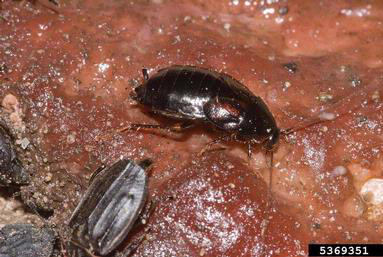

In [9]:
#overview of example picture: cockroach
PIL.Image.open(str(train_cock[1]))

In [10]:
#standardized the picture
batch_size = 32
img_height = 180
img_width = 180

#training data set:
train_ds = tf.keras.utils.image_dataset_from_directory(
  'insects/train/',
  image_size=(img_height, img_width),
  batch_size=batch_size)
type(train_ds)

Found 1019 files belonging to 3 classes.


tensorflow.python.data.ops.dataset_ops.BatchDataset

In [11]:
#define the class_names
class_names = train_ds.class_names

In [12]:
#stabdardized test data set:
test_ds = tf.keras.utils.image_dataset_from_directory(
  'insects/test/',
  image_size=(img_height, img_width),
  batch_size=batch_size)
type(test_ds)

Found 180 files belonging to 3 classes.


tensorflow.python.data.ops.dataset_ops.BatchDataset

In [13]:
# keeps the images in memory after they're loaded off disk during the first epoch. 
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [14]:
# standardized the pictures
normalization_layer = layers.Rescaling(1./255)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]

In [15]:
normalized_ds

<MapDataset shapes: ((None, 180, 180, 3), (None,)), types: (tf.float32, tf.int32)>

In [16]:
# 3 types of insects
num_classes = 3

# create the model:
model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [17]:
# Compile the model
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=['accuracy'])

In [18]:
# Model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [19]:
train_ds

<PrefetchDataset shapes: ((None, 180, 180, 3), (None,)), types: (tf.float32, tf.int32)>

In [20]:
#Train the model
epochs=10
history = model.fit(
  train_ds,
  validation_data=test_ds,
  epochs=epochs
)

Epoch 1/10
32/32 [==============================] - 18s 551ms/step - loss: 1.0955 - accuracy: 0.5947 - val_loss: 0.6977 - val_accuracy: 0.6667
Epoch 2/10
32/32 [==============================] - 16s 507ms/step - loss: 0.4825 - accuracy: 0.8077 - val_loss: 0.5921 - val_accuracy: 0.7222
Epoch 3/10
32/32 [==============================] - 13s 408ms/step - loss: 0.3364 - accuracy: 0.8665 - val_loss: 0.3209 - val_accuracy: 0.8889
Epoch 4/10
32/32 [==============================] - 13s 412ms/step - loss: 0.2389 - accuracy: 0.9156 - val_loss: 0.3191 - val_accuracy: 0.8778
Epoch 5/10
32/32 [==============================] - 13s 415ms/step - loss: 0.1862 - accuracy: 0.9372 - val_loss: 0.2222 - val_accuracy: 0.9111
Epoch 6/10
32/32 [==============================] - 13s 420ms/step - loss: 0.1130 - accuracy: 0.9637 - val_loss: 0.0946 - val_accuracy: 0.9722
Epoch 7/10
32/32 [==============================] - 13s 419ms/step - loss: 0.0855 - accuracy: 0.9676 - val_loss: 0.0627 - val_accuracy: 0.9889

In [21]:
test_beetles = [f for f in glob.glob('insects/test/beetles/*.jpg')]
test_beetles[0]

'insects/test/beetles/5556809.jpg'

In [22]:
#pipixia
img = tf.keras.utils.load_img(
    '皮皮虾.jpg', target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to cockroach with a 99.13 percent confidence.


In [23]:
#Visualize training results
# Create plots of loss and accuracy on the training and validation sets:

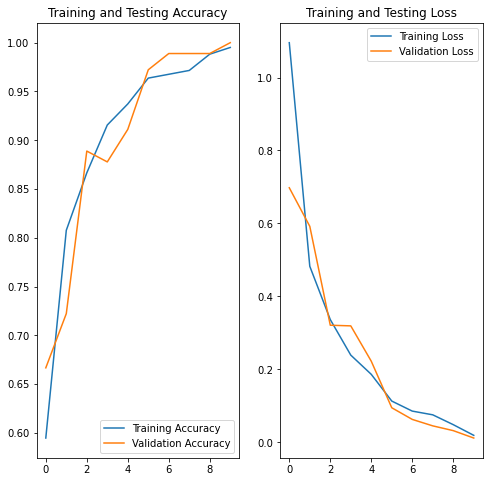

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Testing Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Testing Loss')
plt.show()

In [25]:
# evaluate the model by shap values:

In [26]:
import shap  # import shap package

In [27]:
# convert the train data set to matrix form
x_train = np.concatenate([x for x, y in train_ds], axis = 0)
y_train = np.concatenate([y for x, y in train_ds], axis = 0)
x_train.shape

(1019, 180, 180, 3)

In [28]:
# convert the test data set to matrix form
x_test = np.concatenate([x for x, y in test_ds], axis = 0)
y_test = np.concatenate([y for x, y in test_ds], axis = 0)
x_test.shape

(180, 180, 180, 3)

In [29]:
explainer = shap.GradientExplainer(model, x_train)

In [30]:
#calculate the shap value:
sv = explainer.shap_values(x_test[:20])

`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


In [31]:
y_test

array([1, 2, 2, 2, 0, 2, 1, 0, 2, 0, 1, 1, 0, 2, 2, 2, 0, 2, 0, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 1, 0, 0, 2, 1, 1, 1, 2, 0, 0, 0, 1, 2, 2, 0, 0,
       0, 2, 0, 2, 1, 1, 2, 1, 0, 1, 0, 2, 2, 1, 1, 0, 2, 1, 2, 0, 1, 0,
       1, 1, 2, 0, 2, 0, 0, 1, 2, 0, 2, 2, 0, 2, 0, 0, 2, 0, 1, 0, 1, 2,
       0, 1, 2, 2, 1, 1, 0, 1, 2, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 0, 0, 1,
       2, 1, 0, 0, 0, 0, 2, 0, 2, 2, 2, 1, 0, 1, 2, 2, 2, 1, 0, 0, 2, 1,
       0, 1, 1, 0, 2, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 2, 0, 2, 2, 2, 0,
       0, 2, 1, 2, 0, 0, 0, 1, 1, 1, 0, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 2,
       0, 1, 2, 0], dtype=int32)

In [32]:
model.predict(x_test[:20])

array([[  1.9661766 ,   4.969799  ,  -4.4353247 ],
       [ -2.4037948 ,  -2.774554  ,   9.509967  ],
       [ -2.868266  ,  -0.2502576 ,   3.2236712 ],
       [ -7.6799965 ,  -0.3626338 ,   5.897876  ],
       [ 15.280939  ,   6.041918  ,  -8.26905   ],
       [ -5.3274446 ,  -0.8991212 ,   7.0126896 ],
       [ -1.7860404 ,   9.197866  ,  -5.455247  ],
       [ 15.056523  ,   2.9352229 ,  -5.438633  ],
       [ -7.2025285 ,  -1.606294  ,   7.1856136 ],
       [ 14.819918  ,   3.6238747 ,  -6.783862  ],
       [  1.8713382 ,   8.651873  ,  -7.088401  ],
       [ -3.2053742 ,   3.2846305 ,  -0.592519  ],
       [  8.118528  ,   2.8754964 ,  -3.5608191 ],
       [-14.655109  ,  -1.8026006 ,  15.606653  ],
       [ -2.9925704 ,  -2.0908525 ,   6.140231  ],
       [-12.483664  ,   0.8897587 ,  11.648744  ],
       [  5.476595  ,   2.9898221 ,  -2.6322153 ],
       [-12.845102  ,  -0.91070473,  12.349089  ],
       [ 19.536379  ,   3.7334602 ,  -6.92982   ],
       [ -5.2803984 ,   6.85792

    Reference             beetles             cockroach             dragflies


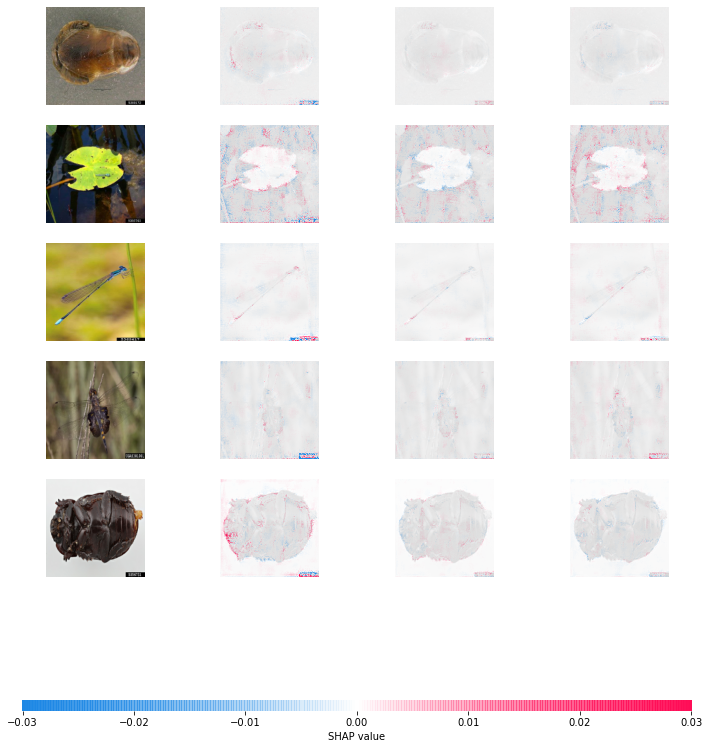

In [37]:
print("    Reference             beetles             cockroach             dragflies")
shap.image_plot([sv[i] for i in range(3)], x_test[0:5])